In [1]:
# import numpy as np
# X = np.array([[0,0],[0,1],[1,0],[1,1]])
# y = np.array([[0],[1],[1],[0]])

In [2]:
# def sigmoid(x):
#     return 1/(1+np.exp(-x))

# def sigmoid_derivative(x):
#     return x*(1-x)

In [3]:
# np.random.seed(42)

# input_size = 2
# hidden_size = 2
# output_size = 1
# learning_rate = 0.1


# W1 = np.random.randn(input_size,hidden_size)
# b1 = np.zeros((1,hidden_size))
# W2 = np.random.randn(hidden_size,output_size)
# b2 = np.zeros((1,output_size))

In [4]:
# epochs = 1000
# for epoch in range(epochs):
#     # forward pass
#     z1 = np.dot(X,W1)+b1
#     a1 = sigmoid(z1)

#     z2 = np.dot(a1,W2) +b2
#     a2 = sigmoid(z2)

#     #backward pass 
#     error = y - a2
#     d_output = error* sigmoid_derivative(a2)

#     error_hidden = np.dot(d_output,W2.T)
#     d_hidden = error_hidden * sigmoid_derivative(a1)

#     # Weight update

#     W2+=np.dot(a1.T,d_output)*learning_rate
#     b2+= np.sum(d_output,axis=0,keepdims=True)*learning_rate

#     W1+= np.dot(X.T,d_hidden)* learning_rate
#     b1+= np.sum(d_hidden,axis=0,keepdims=True)*learning_rate

#     if epoch % 100 == 0:
#         loss = np.mean(np.square(error))
#         print(f"Epoch {epoch}, Loss: {loss:.4f}")

In [5]:
# def predict(x):
#     hidden = sigmoid(np.dot(x, W1) + b1)
#     output = sigmoid(np.dot(hidden, W2) + b2)
#     return output

# print("Predictions:")
# print(predict(X))


Draw an ANN using the original artificial neurons (like the ones in Figure 10-3)
that computes A ⊕ B (where ⊕ represents the XOR operation). Hint: A ⊕ B = (A ∧ ¬ B ∨ (¬ A ∧ B)).

We’ll construct an ANN with 3 layers (Input, Hidden, Output):

1. Inputs

A
B
2. Hidden Layer (2 neurons)

Neuron H1: Computes 
A
∧
¬
B
A∧¬B
Neuron H2: Computes 
¬
A
∧
B
¬A∧B
3. Output Layer

Neuron O: Computes 
H
1
∨
H
2


| A | B | Weighted Sum = A - B | Fires if sum ≥ 1 |
| - | - | -------------------- | ---------------- |
| 1 | 0 | 1                    | Yes (1)          |
| 1 | 1 | 0                    | No (0)           |
| 0 | 1 | -1                   | No (0)           |
| 0 | 0 | 0                    | No (0)           |


| A | B | Weighted Sum = -A + B | Fires if sum ≥ 1 |
| - | - | --------------------- | ---------------- |
| 0 | 1 | 1                     | Yes (1)          |
| 1 | 1 | 0                     | No (0)           |
| 1 | 0 | -1                    | No (0)           |
| 0 | 0 | 0                     | No (0)           |


| H1 | H2 | Sum | Fires |
| -- | -- | --- | ----- |
| 0  | 0  | 0   | 0     |
| 1  | 0  | 1   | 1     |
| 0  | 1  | 1   | 1     |
| 1  | 1  | 2   | 1     |


| A | B | Output (A ⊕ B) |
| - | - | -------------- |
| 0 | 0 | 0              |
| 0 | 1 | 1              |
| 1 | 0 | 1              |
| 1 | 1 | 0              |


Why is it generally preferable to use a Logistic Regression classifier rather than a
classical Perceptron (i.e., a single layer of threshold logic units trained using the
Perceptron training algorithm)? How can you tweak a Perceptron to make it
equivalent to a Logistic Regression classifier?

| Feature                               | Perceptron                       | Logistic Regression               |
| ------------------------------------- | -------------------------------- | --------------------------------- |
| **Output**                            | 0 or 1 (hard classification)     | Probability between 0 and 1       |
| **Loss Function**                     | No loss function (uses mistakes) | Cross-entropy (log loss)          |
| **Convergence on Non-separable Data** | Does **not** converge            | Still converges                   |
| **Gradient-based Optimization**       | No (discrete updates)            | Yes (smooth updates via gradient) |
| **Probabilistic Output**              | No                               | Yes                               |
| **Robustness**                        | Sensitive to noise               | More robust to outliers           |


To convert a classical perceptron into something equivalent to logistic regression, you can make two changes

1. Replace the Step Function with a  Sigmoid Activation function
2. Train using Gradient Descent and cross entropy loss 

 Why was the logistic activation function a key ingredient in training the first
MLPs?

Because the logistic function is differentiable everywhere and its derivative is simple.
2. The logistic function introduces non linearity, allowing mlps to learn complex, non linear boundaries
3. the sigmoid output represents a probablity which makes it ideal for binary classification and output layers of classifiers
 

Name three popular activation functions. Can you draw them?

1. Sigmoid.
2. Tanh.
3. Relu


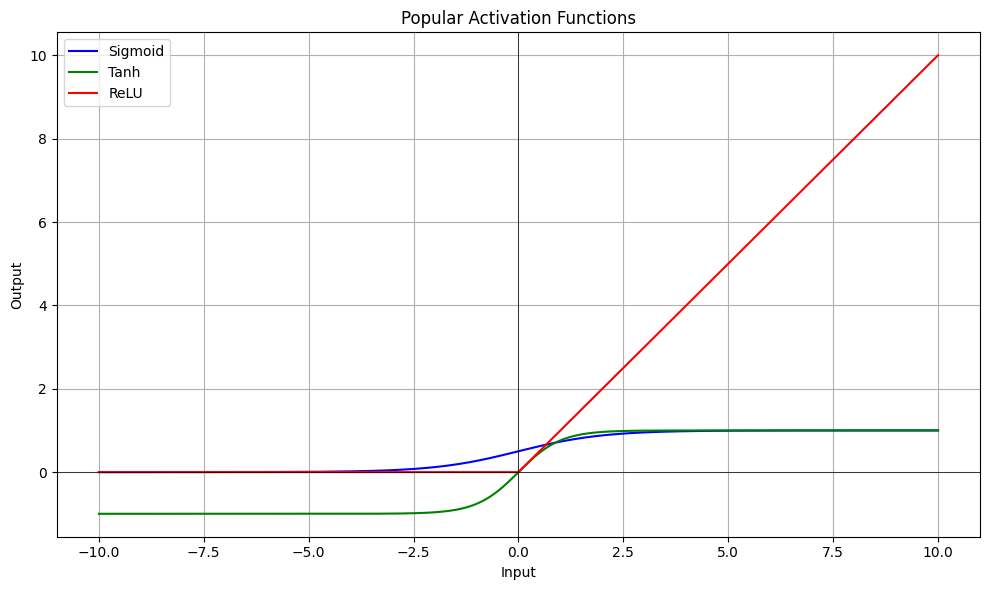

In [6]:
import numpy as np
import matplotlib.pyplot as plt


x = np.linspace(-10, 10, 400)

sigmoid = 1 / (1 + np.exp(-x))     # Sigmoid
tanh = np.tanh(x)                  # Tanh
relu = np.maximum(0, x)           # ReLU

plt.figure(figsize=(10, 6))

plt.plot(x, sigmoid, label='Sigmoid', color='blue')
plt.plot(x, tanh, label='Tanh', color='green')
plt.plot(x, relu, label='ReLU', color='red')


plt.title('Popular Activation Functions')
plt.xlabel('Input')
plt.ylabel('Output')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Suppose you have an MLP composed of one input layer with 10 passthrough
neurons, followed by one hidden layer with 50 artificial neurons, and finally one
output layer with 3 artificial neurons. All artificial neurons use the ReLU activa‐
tion function.
• What is the shape of the input matrix X?
• What are the shapes of the hidden layer’s weight vector Wh and its bias vector
bh?
• What are the shapes of the output layer’s weight vector Wo and its bias vector
bo?
• What is the shape of the network’s output matrix Y?
• Write the equation that computes the network’s output matrix Y as a function
of X, Wh, bh, Wo, and bo.

 Network Architecture Overview.
1. Input layer: 10 passthrough neurons → just inputs (no weights here).
2. Hidden layer: 50 ReLU-activated neurons.
3. Output layer: 3 ReLU-activated neurons.
We’ll assume a batch size of m (i.e., the network processes m input samples at once).

Each input sample has 10 features.

For m samples:
X
∈
R
m
×
10
X∈R 
m×10
 
​	
 

The hidden layer:

Takes input of size 10
Has 50 neurons
So:

Wh connects 10 → 50 neurons:
W
h
∈
R
10
×
50
W 
h
​	
 ∈R 
10×50
 
​	
 
bh adds bias to each of the 50 neurons:
b
h
∈
R
1
×
50
b 
h
​	
 ∈R 
1×50
 
​	
 

The output layer:

Takes input of size 50 (from hidden layer)
Has 3 neurons
So:

Wo connects 50 → 3:
W
o
∈
R
50
×
3
W 
o
​	
 ∈R 
50×3
 
​	
 
bo adds bias to each of the 3 output neurons:
b
o
∈
R
1
×
3
b 
o
​	
 ∈R 
1×3
 


Each of the m inputs produces an output vector of length 3.

Y
∈
R
m
×
3
Y∈R 
m×3
 
​	
 


 
Y=ReLU(ReLU(XW 
h
​	
 +b 
h
​	
 )W 
o
​	
 +b 
o
​	
 )
​	
 


 How many neurons do you need in the output layer if you want to classify email
into spam or ham? What activation function should you use in the output layer?
If instead you want to tackle MNIST, how many neurons do you need in the out‐
put layer, and which activation function should you use? What about for getting
your network to predict housing prices, as in Chapter 2?

| Task                       | Output Neurons | Activation Function | Reason                               |
| -------------------------- | -------------- | ------------------- | ------------------------------------ |
| Email Spam Detection       | 1              | Sigmoid             | Binary probability (spam or not)     |
| MNIST Digit Classification | 10             | Softmax             | Multi-class probability distribution |
| Housing Price Prediction   | 1              | None / Linear       | Continuous value prediction          |


 Can you list all the hyperparameters you can tweak in a basic MLP? If the MLP
overfits the training data, how could you tweak these hyperparameters to try to
solve the problem?

| Category           | Hyperparameter                  | Description                                          |
| ------------------ | ------------------------------- | ---------------------------------------------------- |
| **Architecture**   | Number of hidden layers         | Depth of the network                                 |
|                    | Number of neurons per layer     | Width of each layer                                  |
| **Training**       | Learning rate                   | Step size for weight updates                         |
|                    | Batch size                      | Number of samples per gradient update                |
|                    | Number of epochs                | Total passes over the training data                  |
| **Optimization**   | Optimizer                       | E.g., SGD, Adam, RMSProp                             |
| **Initialization** | Weight initialization method    | E.g., He, Xavier, random normal                      |
| **Activation**     | Activation function             | E.g., ReLU, Tanh, Sigmoid                            |
| **Regularization** | L1/L2 weight regularization (λ) | Penalize large weights                               |
|                    | Dropout rate                    | Fraction of neurons randomly dropped during training |
|                    | Early stopping                  | Stop training when validation error increases        |
| **Data**           | Input normalization             | Feature scaling (e.g., StandardScaler)               |
|                    | Data augmentation               | (for image/text tasks) — apply transformations       |


| Strategy                       | How to Tweak                                | Why                              |
| ------------------------------ | ------------------------------------------- | -------------------------------- |
| **Reduce model capacity**      | Decrease number of layers or neurons        | Prevents memorization            |
| **Add regularization**         | Increase L2 (or L1) penalty                 | Shrinks weights                  |
| **Use dropout**                | Add dropout layers or increase dropout rate | Prevents co-adaptation           |
| **Use early stopping**         | Monitor validation loss and stop early      | Prevents over-training           |
| **Reduce learning rate**       | Slightly lower it (e.g., 0.001 → 0.0005)    | May stabilize updates            |
| **Use batch normalization**    | Add after dense layers                      | Reduces internal covariate shift |
| **Augment data**               | Add noise, flip, scale, etc.                | Exposes model to more variations |
| **Train longer with patience** | Combine with early stopping                 | Better generalization with time  |


Train a deep MLP on the MNIST dataset (you can load it using keras.data
sets.mnist.load_data(). See if you can get over 98% precision. Try searching
for the optimal learning rate by using the approach presented in this chapter (i.e.,
by growing the learning rate exponentially, plotting the loss, and finding the
point where the loss shoots up). Try adding all the bells and whistles—save
checkpoints, use early stopping, and plot learning curves using TensorBoard

In [7]:
from tensorflow import keras
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()


In [8]:
X_train_full.shape

(60000, 28, 28)

In [9]:
X_train_full.dtype


dtype('uint8')

In [10]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

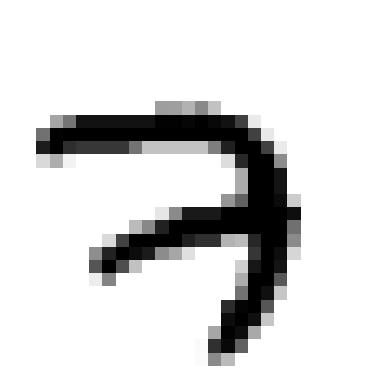

In [11]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

In [12]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [13]:

X_valid.shape

(5000, 28, 28)

In [14]:

X_test.shape

(10000, 28, 28)

In [15]:
K = keras.backend
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [16]:
import tensorflow as tf
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [17]:

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
import tensorflow as tf

initial_learning_rate = 1e-7
lr_variable = K.variable(initial_learning_rate)
optimizer = tf.keras.optimizers.SGD(learning_rate=initial_learning_rate)


In [20]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

In [21]:
print("Optimizer:", model.optimizer)
print("Learning rate type:", type(model.optimizer.learning_rate))
print("Learning rate value:", K.get_value(model.optimizer.learning_rate))

Optimizer: <keras.src.optimizers.sgd.SGD object at 0x11b6ca810>
Learning rate type: <class 'keras.src.backend.Variable'>
Learning rate value: 1e-07


In [22]:
history = model.fit(
    X_train, y_train,
    epochs=1,
    batch_size=128,
    validation_data=(X_valid, y_valid),
    callbacks=[expon_lr]  # or lr_scheduler = ExponentialLRScheduler(factor=1.1)
)


AttributeError: 'str' object has no attribute 'name'